Кластерный анализ (иерархический подход): для выполнения задания возьмите ранее используемый датасет об ирисах.     

In [1]:
import pandas as pd

1) Загрузите данные.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

2) Создайте датафрейм

3) Отобразите 5 первых строк данных. Если присутствует целевая переменная, то удалите ее. 

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


4) Выведите количество признаков и количество наблюдений.

In [4]:
print(f"Количество признаков: {len(data.columns)}")
print(f"Количество наблюдений: {len(data)}")
data.info

Количество признаков: 4
Количество наблюдений: 150


<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(data, 'ward', 'euclidean')

In [6]:
link[:5]

array([[1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00],
       [9.00e+00, 3.40e+01, 1.00e-01, 2.00e+00],
       [1.28e+02, 1.32e+02, 1.00e-01, 2.00e+00]])

5) Постройте дендограмму. Сколько кластеров определяется визуально? 

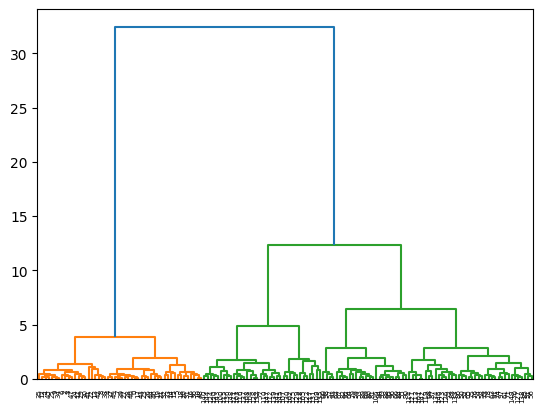

In [7]:
dn = dendrogram(link)

Визуально можно выделить три кластера

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


6) Выполните стандартизацию данных и заново постройте дендограмму. Изменилось ли что-то? 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_S = scaler.fit_transform(data)

In [10]:
link_s = linkage(data_S)
link_s[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00]])

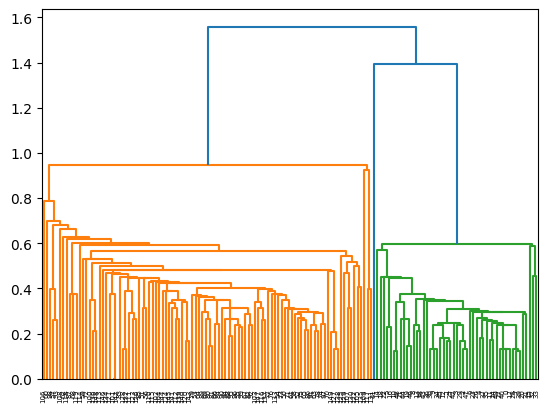

In [11]:
dn_s = dendrogram(link_s)

изменились размеры кластеров

7) Добавьте столбец с номером кластера, в который попал тот или иной объект.

In [12]:
data['cluster'] = fcluster(link, 3, criterion='maxclust')

In [13]:
data['target'] = iris.target

In [14]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,3,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [15]:
data.groupby('cluster').sum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
cluster,,,,,
1,250.3,171.4,73.1,12.3,0
2,247.3,111.1,207.7,75.8,71
3,378.9,176.1,282.9,91.8,79
